In [1]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.fft import fft
import numpy as np

In [2]:
help(wav.read)

Help on function read in module scipy.io.wavfile:

read(filename, mmap=False)
    Open a WAV file.

    Return the sample rate (in samples/sec) and data from an LPCM WAV file.

    Parameters
    ----------
    filename : string or open file handle
        Input WAV file.
    mmap : bool, optional
        Whether to read data as memory-mapped (default: False).  Not compatible
        with some bit depths; see Notes.  Only to be used on real files.

        .. versionadded:: 0.12.0

    Returns
    -------
    rate : int
        Sample rate of WAV file.
    data : numpy array
        Data read from WAV file. Data-type is determined from the file;
        see Notes.  Data is 1-D for 1-channel WAV, or 2-D of shape
        (Nsamples, Nchannels) otherwise. If a file-like input without a
        C-like file descriptor (e.g., :class:`python:io.BytesIO`) is
        passed, this will not be writeable.

    Notes
    -----
    Common data types: [1]_

    =====================  ===========  ====

In [3]:
#Read audio file
sample_rate, data = wav.read('audio_file.wav')

C:\Users\Anamika\AppData\Local\Temp\ipykernel_5208\4272823160.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read('audio_file.wav')


In [4]:
#extract a small segment from the audio file
start = 2000 #start index of the segment
segment_len = 1024 #length of the segment
audio_segment = data[start:start+segment_len]

In [5]:
#perform Fast Fourier Transform (fft) to get the frequency components
frequencies = fft(audio_segment)
frequencies = np.fft.fftshift(frequencies) #shift zero frequency component to the center
print(frequencies)

[[   122.-0.j  -9740.-0.j]
 [   121.-0.j  -9955.-0.j]
 [   124.-0.j -10142.-0.j]
 ...
 [   115.-0.j  -9051.-0.j]
 [   114.-0.j  -9290.-0.j]
 [   115.-0.j  -9531.-0.j]]


In [6]:
freq_values = np.fft.fftshift(np.fft.fftfreq(len(audio_segment),1/sample_rate))
print(freq_values)

[-22050.         -22006.93359375 -21963.8671875  ...  21920.80078125
  21963.8671875   22006.93359375]


In [7]:
magnitude = np.abs(frequencies)
print(magnitude)

[[  122.  9740.]
 [  121.  9955.]
 [  124. 10142.]
 ...
 [  115.  9051.]
 [  114.  9290.]
 [  115.  9531.]]


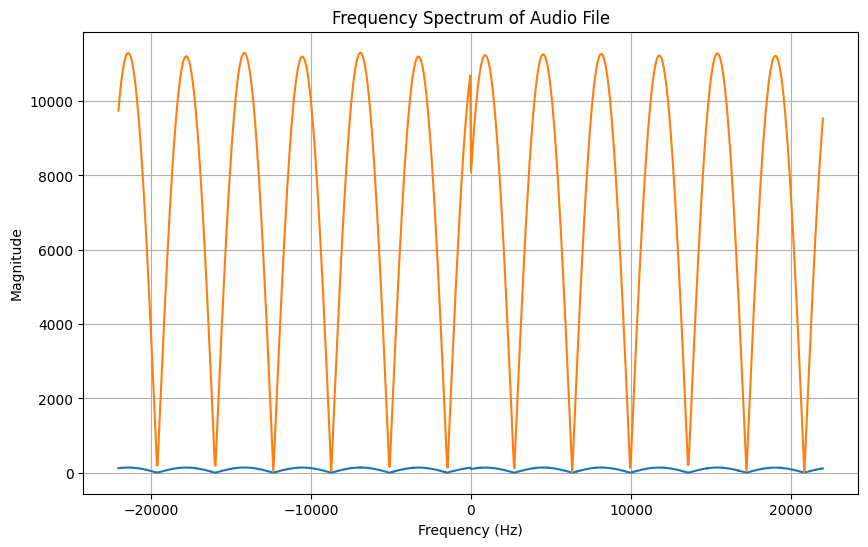

In [8]:
#plot the frequency spectrum
plt.figure(figsize=(10,6))
plt.plot(freq_values, magnitude)
plt.title("Frequency Spectrum of Audio File")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [9]:
from scipy.interpolate import interp1d

In [10]:
days = np.array([1,2,3,4,5,6,8,9,10])
temp_data = np.array([39,40,40,39,40,39,37,37,33])

#create interpolation function
inter_func = interp1d(days, temp_data, kind="linear")

#estimate temp on day 7
predict_date = 7
temp_day_7 = inter_func(predict_date)

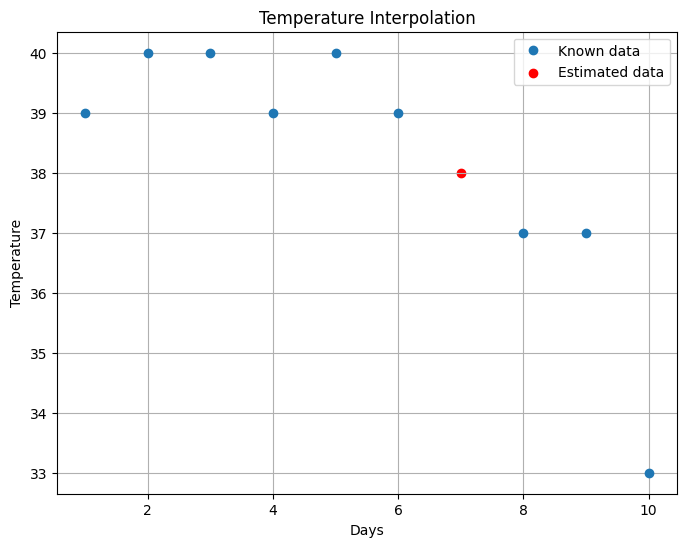

In [11]:
#plotting
plt.figure(figsize=(8,6))
plt.plot(days, temp_data, 'o', label="Known data")
plt.scatter(predict_date, temp_day_7,color='r', label="Estimated data")
plt.title("Temperature Interpolation")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

The estimated temperature on day 7 is 38 °C.

In [12]:
from scipy.io import savemat
import datetime

sl_no = range(1,101)
temp = np.random.normal(0,1,100)

In [13]:
data = {'sl_no':sl_no, 'temperature':temp}

savemat('data.mat', data)